In [1]:
## To import SLAMLOG 
## FIX: (inside framework/tools/python/slamlog.py change "import from utils" to "import from .utils")

import framework.tools.python.slamlog as slamlog
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.interpolate as interpolate
import re
import glob




In [2]:
## However you can , list the files : 
mypath = "./experiments/original/"
icl0_orb_int = glob.glob(mypath + "1-0-ICL0-ORB-*.log")
icl2_orb_int = glob.glob(mypath + "1-0-ICL2-ORB-*.log")
icl3_orb_int = glob.glob(mypath + "1-0-ICL3-ORB-*.log")

tum1xyz_orb_int = glob.glob(mypath + "1-0-TUM1XYZ-ORB-*.log")
tum2xyz_orb_int = glob.glob(mypath + "1-0-TUM2XYZ-ORB-*.log")
tum1rpy_orb_int = glob.glob(mypath + "1-0-TUM1RPY-ORB-*.log")
tum2rpy_orb_int = glob.glob(mypath + "1-0-TUM2RPY-ORB-*.log")

icl0_orb_dep = glob.glob(mypath + "0-1-ICL0-ORB-*.log")
icl2_orb_dep = glob.glob(mypath + "0-1-ICL2-ORB-*.log")
icl3_orb_dep = glob.glob(mypath + "0-1-ICL3-ORB-*.log")

tum1xyz_orb_dep = glob.glob(mypath + "0-1-TUM1XYZ-ORB-*.log")
tum2xyz_orb_dep = glob.glob(mypath + "0-1-TUM2XYZ-ORB-*.log")
tum1rpy_orb_dep = glob.glob(mypath + "0-1-TUM1RPY-ORB-*.log")
tum2rpy_orb_dep = glob.glob(mypath + "0-1-TUM2RPY-ORB-*.log")

icl0_orb_com = glob.glob(mypath + "1-1-ICL0-ORB-*.log")
icl2_orb_com = glob.glob(mypath + "1-1-ICL2-ORB-*.log")
icl3_orb_com = glob.glob(mypath + "1-1-ICL3-ORB-*.log")

tum1xyz_orb_com = glob.glob(mypath + "1-1-TUM1XYZ-ORB-*.log")
tum2xyz_orb_com = glob.glob(mypath + "1-1-TUM2XYZ-ORB-*.log")
tum1rpy_orb_com = glob.glob(mypath + "1-1-TUM1RPY-ORB-*.log")
tum2rpy_orb_com = glob.glob(mypath + "1-1-TUM2RPY-ORB-*.log")

icl1_kf_int = glob.glob(mypath + "1-0-ICL1-KF-*.log")
icl2_kf_int = glob.glob(mypath + "1-0-ICL2-KF-*.log")

tum1xyz_kf_int = glob.glob(mypath + "1-0-TUM1XYZ-KF-*.log")
tum2xyz_kf_int = glob.glob(mypath + "1-0-TUM2XYZ-KF-*.log")
tum1rpy_kf_int = glob.glob(mypath + "1-0-TUM1RPY-KF-*.log")
tum2rpy_kf_int = glob.glob(mypath + "1-0-TUM2RPY-KF-*.log")

icl1_kf_dep = glob.glob(mypath + "0-1-ICL1-KF-*.log")
icl2_kf_dep = glob.glob(mypath + "0-1-ICL2-KF-*.log")

tum1xyz_kf_dep = glob.glob(mypath + "0-1-TUM1XYZ-KF-*.log")
tum2xyz_kf_dep = glob.glob(mypath + "0-1-TUM2XYZ-KF-*.log")
tum1rpy_kf_dep = glob.glob(mypath + "0-1-TUM1RPY-KF-*.log")
tum2rpy_kf_dep = glob.glob(mypath + "0-1-TUM2RPY-KF-*.log")

icl1_kf_com = glob.glob(mypath + "1-1-ICL1-KF-*.log")
icl2_kf_com = glob.glob(mypath + "1-1-ICL2-KF-*.log")

tum1xyz_kf_com = glob.glob(mypath + "1-1-TUM1XYZ-KF-*.log")
tum2xyz_kf_com = glob.glob(mypath + "1-1-TUM2XYZ-KF-*.log")
tum1rpy_kf_com = glob.glob(mypath + "1-1-TUM1RPY-KF-*.log")
tum2rpy_kf_com = glob.glob(mypath + "1-1-TUM2RPY-KF-*.log")

icl1_inf_int = glob.glob(mypath + "1-0-ICL1-INF-*.log")
icl3_inf_int = glob.glob(mypath + "1-0-ICL3-INF-*.log")

tum1xyz_inf_int = glob.glob(mypath + "1-0-TUM1XYZ-INF-*.log")
tum2xyz_inf_int = glob.glob(mypath + "1-0-TUM2XYZ-INF-*.log")
tum1rpy_inf_int = glob.glob(mypath + "1-0-TUM1RPY-INF-*.log")

icl1_inf_dep = glob.glob(mypath + "0-1-ICL1-INF-*.log")
icl3_inf_dep = glob.glob(mypath + "0-1-ICL3-INF-*.log")

tum1xyz_inf_dep = glob.glob(mypath + "0-1-TUM1XYZ-INF-*.log")
tum2xyz_inf_dep = glob.glob(mypath + "0-1-TUM2XYZ-INF-*.log")
tum1rpy_inf_dep = glob.glob(mypath + "0-1-TUM1RPY-INF-*.log")

icl1_inf_com = glob.glob(mypath + "1-1-ICL1-INF-*.log")
icl3_inf_com = glob.glob(mypath + "1-1-ICL3-INF-*.log")

tum1xyz_inf_com = glob.glob(mypath + "1-1-TUM1XYZ-INF-*.log")
tum2xyz_inf_com = glob.glob(mypath + "1-1-TUM2XYZ-INF-*.log")
tum1rpy_inf_com = glob.glob(mypath + "1-1-TUM1RPY-INF-*.log")

In [3]:
## Then we can load the files (very slow)

icl0_orb_int = slamlog.load_inputs(icl0_orb_int)
icl2_orb_int = slamlog.load_inputs(icl2_orb_int)
icl3_orb_int = slamlog.load_inputs(icl3_orb_int)

tum1xyz_orb_int =slamlog.load_inputs(tum1xyz_orb_int)
tum2xyz_orb_int =slamlog.load_inputs(tum2xyz_orb_int)
tum1rpy_orb_int =slamlog.load_inputs(tum1rpy_orb_int)
tum2rpy_orb_int =slamlog.load_inputs(tum2rpy_orb_int)

icl0_orb_dep = slamlog.load_inputs(icl0_orb_dep)
icl2_orb_dep = slamlog.load_inputs(icl2_orb_dep)
icl3_orb_dep = slamlog.load_inputs(icl3_orb_dep)

tum1xyz_orb_dep = slamlog.load_inputs(tum1xyz_orb_dep)
tum2xyz_orb_dep = slamlog.load_inputs(tum2xyz_orb_dep)
tum1rpy_orb_dep = slamlog.load_inputs(tum1rpy_orb_dep)
tum2rpy_orb_dep = slamlog.load_inputs(tum2rpy_orb_dep)

icl0_orb_com = slamlog.load_inputs(icl0_orb_com)
icl2_orb_com = slamlog.load_inputs(icl2_orb_com)
icl3_orb_com = slamlog.load_inputs(icl3_orb_com)

tum1xyz_orb_com = slamlog.load_inputs(tum1xyz_orb_com)
tum2xyz_orb_com = slamlog.load_inputs(tum2xyz_orb_com)
tum1rpy_orb_com = slamlog.load_inputs(tum1rpy_orb_com)
tum2rpy_orb_com = slamlog.load_inputs(tum2rpy_orb_com)

icl1_kf_int = slamlog.load_inputs(icl1_kf_int)
icl2_kf_int = slamlog.load_inputs(icl2_kf_int)

tum1xyz_kf_int = slamlog.load_inputs(tum1xyz_kf_int)
tum2xyz_kf_int = slamlog.load_inputs(tum2xyz_kf_int)
tum1rpy_kf_int = slamlog.load_inputs(tum1rpy_kf_int)
tum2rpy_kf_int = slamlog.load_inputs(tum2rpy_kf_int)

icl1_kf_dep = slamlog.load_inputs(icl1_kf_dep)
icl2_kf_dep = slamlog.load_inputs(icl2_kf_dep)

tum1xyz_kf_dep = slamlog.load_inputs(tum1xyz_kf_dep)
tum2xyz_kf_dep = slamlog.load_inputs(tum2xyz_kf_dep)
tum1rpy_kf_dep = slamlog.load_inputs(tum1rpy_kf_dep)
tum2rpy_kf_dep = slamlog.load_inputs(tum2rpy_kf_dep)

icl1_kf_com = slamlog.load_inputs(icl1_kf_com)
icl2_kf_com = slamlog.load_inputs(icl2_kf_com)

tum1xyz_kf_com = slamlog.load_inputs(tum1xyz_kf_com)
tum2xyz_kf_com = slamlog.load_inputs(tum2xyz_kf_com)
tum1rpy_kf_com = slamlog.load_inputs(tum1rpy_kf_com)
tum2rpy_kf_com = slamlog.load_inputs(tum2rpy_kf_com)

icl1_inf_int = slamlog.load_inputs(icl1_inf_int)
icl3_inf_int = slamlog.load_inputs(icl3_inf_int)

tum1xyz_inf_int = slamlog.load_inputs(tum1xyz_inf_int)
tum2xyz_inf_int = slamlog.load_inputs(tum2xyz_inf_int)
tum1rpy_inf_int = slamlog.load_inputs(tum1rpy_inf_int)

icl1_inf_dep = slamlog.load_inputs(icl1_inf_dep)
icl3_inf_dep = slamlog.load_inputs(icl3_inf_dep)

tum1xyz_inf_dep = slamlog.load_inputs(tum1xyz_inf_dep)
tum2xyz_inf_dep = slamlog.load_inputs(tum2xyz_inf_dep)
tum1rpy_inf_dep = slamlog.load_inputs(tum1rpy_inf_dep)

icl1_inf_com = slamlog.load_inputs(icl1_inf_com)
icl3_inf_com = slamlog.load_inputs(icl3_inf_com)

tum1xyz_inf_com = slamlog.load_inputs(tum1xyz_inf_com)
tum2xyz_inf_com = slamlog.load_inputs(tum2xyz_inf_com)
tum1rpy_inf_com = slamlog.load_inputs(tum1rpy_inf_com)


In [111]:
# baseline
icl0_kf = glob.glob(mypath + "ICL0-KF.log")
icl1_kf = glob.glob(mypath + "ICL1-KF.log")
icl2_kf = glob.glob(mypath + "ICL2-KF.log")
icl3_kf = glob.glob(mypath + "ICL3-KF.log")

tum1rpy_kf = glob.glob(mypath + "TUM1RPY-KF.log")
tum1xyz_kf = glob.glob(mypath + "TUM1XYZ-KF.log")
tum2rpy_kf = glob.glob(mypath + "TUM2RPY-KF.log")
tum2xyz_kf = glob.glob(mypath + "TUM2XYZ-KF.log")

icl0_inf = glob.glob(mypath + "ICL0-INF.log")
icl1_inf = glob.glob(mypath + "ICL1-INF.log")
icl2_inf = glob.glob(mypath + "ICL2-INF.log")
icl3_inf = glob.glob(mypath + "ICL3-INF.log")

tum1rpy_inf = glob.glob(mypath + "TUM1RPY-INF.log")
tum1xyz_inf = glob.glob(mypath + "TUM1XYZ-INF.log")
tum2rpy_inf = glob.glob(mypath + "TUM2RPY-INF.log")
tum2xyz_inf = glob.glob(mypath + "TUM2XYZ-INF.log")

icl0_orb = glob.glob(mypath + "ICL0-ORB.log")
icl1_orb = glob.glob(mypath + "ICL1-ORB.log")
icl2_orb = glob.glob(mypath + "ICL2-ORB.log")
icl3_orb = glob.glob(mypath + "ICL3-ORB.log")

tum1rpy_orb = glob.glob(mypath + "TUM1RPY-ORB.log")
tum1xyz_orb = glob.glob(mypath + "TUM1XYZ-ORB.log")
tum2rpy_orb = glob.glob(mypath + "TUM2RPY-ORB.log")
tum2xyz_orb = glob.glob(mypath + "TUM2XYZ-ORB.log")


icl0_kf = slamlog.load_inputs(icl0_kf)
icl1_kf = slamlog.load_inputs(icl1_kf)
icl2_kf = slamlog.load_inputs(icl2_kf)
icl3_kf = slamlog.load_inputs(icl3_kf)

tum1rpy_kf = slamlog.load_inputs(tum1rpy_kf)
tum1xyz_kf = slamlog.load_inputs(tum1xyz_kf)
tum2rpy_kf = slamlog.load_inputs(tum2rpy_kf)
tum2xyz_kf = slamlog.load_inputs(tum2xyz_kf)

icl0_inf = slamlog.load_inputs(icl0_inf)
icl1_inf = slamlog.load_inputs(icl1_inf)
icl2_inf = slamlog.load_inputs(icl2_inf)
icl3_inf = slamlog.load_inputs(icl3_inf)

tum1rpy_inf = slamlog.load_inputs(tum1rpy_inf)
tum1xyz_inf = slamlog.load_inputs(tum1xyz_inf)
tum2rpy_inf = slamlog.load_inputs(tum2rpy_inf)
tum2xyz_inf = slamlog.load_inputs(tum2xyz_inf)

icl0_orb = slamlog.load_inputs(icl0_orb)
icl1_orb = slamlog.load_inputs(icl1_orb)
icl2_orb = slamlog.load_inputs(icl2_orb)
icl3_orb = slamlog.load_inputs(icl3_orb)

tum1rpy_orb = slamlog.load_inputs(tum1rpy_orb)
tum1xyz_orb = slamlog.load_inputs(tum1xyz_orb)
tum2rpy_orb = slamlog.load_inputs(tum2rpy_orb)
tum2xyz_orb = slamlog.load_inputs(tum2xyz_orb)


      config    MaxATE
13  0.000010  0.067151
14  0.000020  0.060854
3   0.000080  0.062858
1   0.000100  0.062124
6   0.000125  0.059301
12  0.000150  0.063287
4   0.000200  0.074532
7   0.000250  0.061797
8   0.000500  0.064774
9   0.000800  0.061261
0   0.001250  0.062235
2   0.001500  0.062554
10  0.001750  0.059222
18  0.002000  0.066688
5   0.002250  0.071990
15  0.002500  0.096892
16  0.002750  0.094160
17  0.003000  0.076207
11  0.003500  0.068637
20  0.004000  0.145795
19  0.004500  0.121228
7.955321000000001
10.222441000000005
4.15737


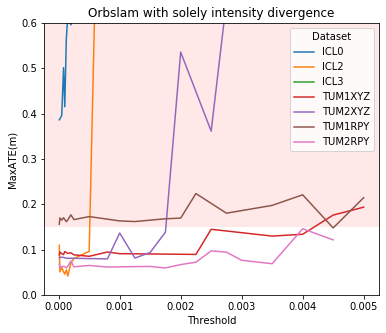

In [143]:
## For example to generate the pareto Accuracy / ExecutionTime

#'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX'], 'FPS':  (1 / x ['Summary']['algo']['Duration_Frame']['MEAN'])
mycleandata1 = [ {'config': float(re.search("1-0-ICL0-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl0_orb_int.items())[:] ]
mycleandata2 = [ {'config': float(re.search("1-0-ICL2-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl2_orb_int.items())[:] ]
mycleandata3 = [ {'config': float(re.search("1-0-ICL3-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl3_orb_int.items())[:] ]

mycleandata4 = [ {'config': float(re.search("1-0-TUM1XYZ-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1xyz_orb_int.items())[:] ]
mycleandata5 = [ {'config': float(re.search("1-0-TUM2XYZ-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2xyz_orb_int.items())[:] ]
mycleandata6 = [ {'config': float(re.search("1-0-TUM1RPY-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1rpy_orb_int.items())[:] ]
mycleandata7 = [ {'config': float(re.search("1-0-TUM2RPY-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2rpy_orb_int.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')
df3 = pd.DataFrame(mycleandata3).sort_values('config')
df4 = pd.DataFrame(mycleandata4).sort_values('config')
df5 = pd.DataFrame(mycleandata5).sort_values('config')
df6 = pd.DataFrame(mycleandata6).sort_values('config')
df7 = pd.DataFrame(mycleandata7).sort_values('config')

plt.plot('config', 'MaxATE', data=df1, label='ICL0')
plt.plot('config', 'MaxATE', data=df2, label='ICL2')
plt.plot('config', 'MaxATE', data=df3, label='ICL3')
plt.plot('config', 'MaxATE', data=df4, label='TUM1XYZ')
plt.plot('config', 'MaxATE', data=df5, label='TUM2XYZ')
plt.plot('config', 'MaxATE', data=df6, label='TUM1RPY')
plt.plot('config', 'MaxATE', data=df7, label='TUM2RPY')
plt.ylim(0,0.6)
plt.axhspan(0.15, 0.6, color='r', alpha=0.09, lw=0)
plt.legend(title="Dataset")
plt.xlabel("Threshold")
plt.ylabel("MaxATE(m)")
plt.title("Orbslam with solely intensity divergence")
plt.rcParams['figure.figsize'] = [6, 5]
print(df7)
print(sum(tum1xyz_orb_int['./experiments/original/1-0-TUM1XYZ-ORB-0.0045.log']['Statistics']['Duration_Frame']))
print(sum(tum2xyz_orb_int['./experiments/original/1-0-TUM2XYZ-ORB-0.00175.log']['Statistics']['Duration_Frame']))
print(sum(tum2rpy_orb_int['./experiments/original/1-0-TUM2RPY-ORB-0.0045.log']['Statistics']['Duration_Frame']))


17.142002999999995
3.4947429999999997
16.50350099999999
39.78430300000006
52.666855000000055


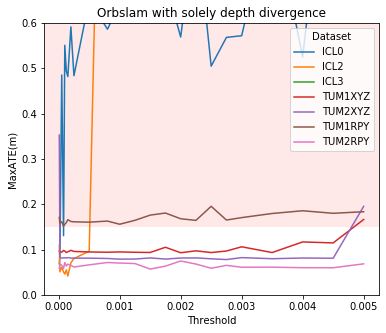

In [153]:
mycleandata1 = [ {'config': float(re.search("0-1-ICL0-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl0_orb_dep.items())[:] ]
mycleandata2 = [ {'config': float(re.search("0-1-ICL2-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl2_orb_dep.items())[:] ]
mycleandata3 = [ {'config': float(re.search("0-1-ICL3-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl3_orb_dep.items())[:] ]

mycleandata4 = [ {'config': float(re.search("0-1-TUM1XYZ-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1xyz_orb_dep.items())[:] ]
mycleandata5 = [ {'config': float(re.search("0-1-TUM2XYZ-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2xyz_orb_dep.items())[:] ]
mycleandata6 = [ {'config': float(re.search("0-1-TUM1RPY-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1rpy_orb_dep.items())[:] ]
mycleandata7 = [ {'config': float(re.search("0-1-TUM2RPY-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2rpy_orb_dep.items())[:] ]



df1 = pd.DataFrame(mycleandata1).sort_values('config')
#df2 = pd.DataFrame(mycleandata2).sort_values('config')
#df3 = pd.DataFrame(mycleandata3).sort_values('config')
df4 = pd.DataFrame(mycleandata4).sort_values('config')
df5 = pd.DataFrame(mycleandata5).sort_values('config')
df6 = pd.DataFrame(mycleandata6).sort_values('config')
df7 = pd.DataFrame(mycleandata7).sort_values('config')

df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
df['MaxATE2'] = df2['MaxATE']
df['MaxATE3'] = df3['MaxATE']
df['MaxATE4'] = df4['MaxATE']
df['MaxATE5'] = df5['MaxATE']
df['MaxATE6'] = df6['MaxATE']
df['MaxATE7'] = df7['MaxATE']

plt.plot('config', 'MaxATE1', data=df, label='ICL0')
plt.plot('config', 'MaxATE', data=df2, label='ICL2')
plt.plot('config', 'MaxATE', data=df3, label='ICL3')
plt.plot('config', 'MaxATE', data=df4, label='TUM1XYZ')
plt.plot('config', 'MaxATE5', data=df, label='TUM2XYZ')
plt.plot('config', 'MaxATE', data=df6, label='TUM1RPY')
plt.plot('config', 'MaxATE7', data=df, label='TUM2RPY')
plt.axhspan(0.15, 0.6, color='r', alpha=0.09, lw=0)
plt.ylim(0,0.6)
plt.legend(title="Dataset")
plt.xlabel("Threshold")
plt.ylabel("MaxATE(m)")
plt.title("Orbslam with solely depth divergence")
print(sum(icl0_orb_dep['./experiments/original/0-1-ICL0-ORB-0.00002.log']['Statistics']['Duration_Frame']))
print(sum(icl2_orb_dep['./experiments/original/0-1-ICL2-ORB-0.0005.log']['Statistics']['Duration_Frame']))
print(sum(tum1xyz_orb_dep['./experiments/original/0-1-TUM1XYZ-ORB-0.0045.log']['Statistics']['Duration_Frame']))
print(sum(tum2xyz_orb_dep['./experiments/original/0-1-TUM2XYZ-ORB-0.004.log']['Statistics']['Duration_Frame']))
print(sum(tum2rpy_orb_dep['./experiments/original/0-1-TUM2RPY-ORB-0.005.log']['Statistics']['Duration_Frame']))


      config    MaxATE
3   0.000010  0.109225
8   0.000020  0.050663
13  0.000050  0.060516
19  0.000080  0.050437
2   0.000100  0.045693
10  0.000125  0.055041
4   0.000150  0.041357
7   0.000200  0.070410
23  0.000250  0.080021
14  0.000500  0.096168
18  0.000800  1.868957
9   0.001000  1.958013
17  0.001250  1.861141
1   0.001500  1.804338
6   0.001750  1.807462
5   0.002000  1.956616
21  0.002250  1.816905
22  0.002500  2.013191
15  0.002750  2.026912
0   0.003000  2.614548
20  0.003500  2.708126
12  0.004000  2.055908
16  0.004500  2.223439
11  0.005000  2.052080
19.957602000000012
8.970533000000003
43.83696599999998
45.857474000000025
42.35703999999996


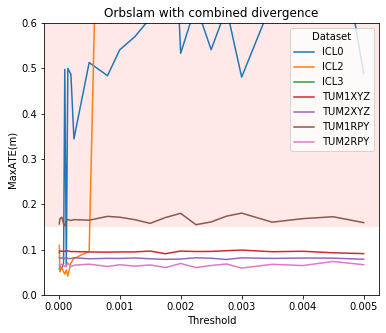

In [159]:
mycleandata1 = [ {'config': float(re.search("1-1-ICL0-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl0_orb_com.items())[:] ]
mycleandata2 = [ {'config': float(re.search("1-1-ICL2-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl2_orb_com.items())[:] ]
mycleandata3 = [ {'config': float(re.search("1-1-ICL3-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl3_orb_com.items())[:] ]

mycleandata4 = [ {'config': float(re.search("1-1-TUM1XYZ-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1xyz_orb_com.items())[:] ]
mycleandata5 = [ {'config': float(re.search("1-1-TUM2XYZ-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2xyz_orb_com.items())[:] ]
mycleandata6 = [ {'config': float(re.search("1-1-TUM1RPY-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1rpy_orb_com.items())[:] ]
mycleandata7 = [ {'config': float(re.search("1-1-TUM2RPY-ORB-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2rpy_orb_com.items())[:] ]



df1 = pd.DataFrame(mycleandata1).sort_values('config')
#df2 = pd.DataFrame(mycleandata2).sort_values('config')
#df3 = pd.DataFrame(mycleandata3).sort_values('config')
df4 = pd.DataFrame(mycleandata4).sort_values('config')
df5 = pd.DataFrame(mycleandata5).sort_values('config')
df6 = pd.DataFrame(mycleandata6).sort_values('config')
df7 = pd.DataFrame(mycleandata7).sort_values('config')

df = df1
df=df.rename(columns = {'MaxATE':'MaxATE1'})
#df['MaxATE2'] = df2['MaxATE']
#df['MaxATE3'] = df3['MaxATE']
df['MaxATE4'] = df4['MaxATE']
df['MaxATE5'] = df5['MaxATE']
df['MaxATE6'] = df6['MaxATE']
df['MaxATE7'] = df7['MaxATE']

plt.plot('config', 'MaxATE', data=df1, label='ICL0')
plt.plot('config', 'MaxATE', data=df2, label='ICL2')
plt.plot('config', 'MaxATE', data=df3, label='ICL3')
plt.plot('config', 'MaxATE', data=df4, label='TUM1XYZ')
plt.plot('config', 'MaxATE', data=df5, label='TUM2XYZ')
plt.plot('config', 'MaxATE', data=df6, label='TUM1RPY')
plt.plot('config', 'MaxATE', data=df7, label='TUM2RPY')
plt.ylim(0,0.6)
plt.axhspan(0.15, 0.6, color='r', alpha=0.09, lw=0)
plt.legend(title="Dataset")
plt.xlabel("Threshold")
plt.ylabel("MaxATE(m)")
plt.title("Orbslam with combined divergence")
print(df2)
print(sum(icl0_orb_com['./experiments/original/1-1-ICL0-ORB-0.00008.log']['Statistics']['Duration_Frame']))
print(sum(icl2_orb_com['./experiments/original/1-1-ICL2-ORB-0.0005.log']['Statistics']['Duration_Frame']))
print(sum(tum1xyz_orb_com['./experiments/original/1-1-TUM1XYZ-ORB-0.005.log']['Statistics']['Duration_Frame']))
print(sum(tum2xyz_orb_com['./experiments/original/1-1-TUM2XYZ-ORB-0.005.log']['Statistics']['Duration_Frame']))
print(sum(tum2rpy_orb_com['./experiments/original/1-1-TUM2RPY-ORB-0.005.log']['Statistics']['Duration_Frame']))






      config    MaxATE
21  0.000010  0.023416
18  0.000020  0.023593
13  0.000050  0.022395
2   0.000080  0.021972
7   0.000100  0.748568
9   0.000125  0.275245
22  0.000150  0.314584
5   0.000200  0.306573
0   0.000250  2.898746
3   0.000500  0.654623
10  0.000800  2.331945
14  0.001000  1.973108
4   0.001250  2.787635
6   0.001500  1.779678
19  0.001750  2.588109
17  0.002000  2.497366
1   0.002250  2.670510
8   0.002500  2.605378
11  0.002750  2.669854
16  0.003000  2.669854
12  0.003500  2.672215
23  0.004000  2.250235
15  0.004500  2.502298
20  0.005000  2.669854
3.630806999999997
1.7637690000000006


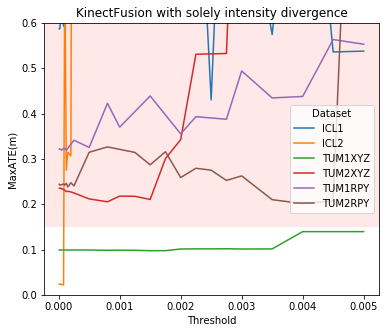

In [162]:
mycleandata1 = [ {'config': float(re.search("1-0-ICL1-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl1_kf_int.items())[:] ]
mycleandata2 = [ {'config': float(re.search("1-0-ICL2-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl2_kf_int.items())[:] ]

mycleandata4 = [ {'config': float(re.search("1-0-TUM1XYZ-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1xyz_kf_int.items())[:] ]
mycleandata5 = [ {'config': float(re.search("1-0-TUM2XYZ-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2xyz_kf_int.items())[:] ]
mycleandata6 = [ {'config': float(re.search("1-0-TUM1RPY-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1rpy_kf_int.items())[:] ]
mycleandata7 = [ {'config': float(re.search("1-0-TUM2RPY-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2rpy_kf_int.items())[:] ]



df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')
df4 = pd.DataFrame(mycleandata4).sort_values('config')
df5 = pd.DataFrame(mycleandata5).sort_values('config')
df6 = pd.DataFrame(mycleandata6).sort_values('config')
df7 = pd.DataFrame(mycleandata7).sort_values('config')


plt.plot('config', 'MaxATE', data=df1, label='ICL1')
plt.plot('config', 'MaxATE', data=df2, label='ICL2')
plt.plot('config', 'MaxATE', data=df4, label='TUM1XYZ')
plt.plot('config', 'MaxATE', data=df5, label='TUM2XYZ')
plt.plot('config', 'MaxATE', data=df6, label='TUM1RPY')
plt.plot('config', 'MaxATE', data=df7, label='TUM2RPY')
plt.ylim(0,0.6)
plt.axhspan(0.15, 0.6, color='r', alpha=0.09, lw=0)
plt.legend(title="Dataset")
plt.xlabel("Threshold")
plt.ylabel("MaxATE(m)")
plt.title("KinectFusion with solely intensity divergence")

print(sum(icl2_kf_int['./experiments/original/1-0-ICL2-KF-0.00008.log']['Statistics']['Duration_Frame']))
print(sum(tum1xyz_kf_int['./experiments/original/1-0-TUM1XYZ-KF-0.005.log']['Statistics']['Duration_Frame']))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'MeanATE against frame number for TUM1RPY')

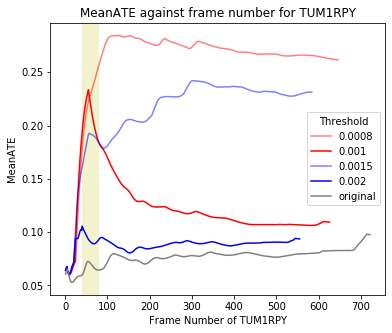

In [206]:
plt.plot(tum1rpy_kf_int['./experiments/original/1-0-TUM1RPY-KF-0.0008.log']['Statistics']['Frame Number'], tum1rpy_kf_int['./experiments/original/1-0-TUM1RPY-KF-0.0008.log']['Statistics']['MeanATE'], alpha = 0.5, color='red', label = '0.0008')
plt.plot(tum1rpy_kf_int['./experiments/original/1-0-TUM1RPY-KF-0.001.log']['Statistics']['Frame Number'], tum1rpy_kf_int['./experiments/original/1-0-TUM1RPY-KF-0.001.log']['Statistics']['MeanATE'], color='red', label = '0.001')

plt.plot(tum1rpy_kf_int['./experiments/original/1-0-TUM1RPY-KF-0.0015.log']['Statistics']['Frame Number'], tum1rpy_kf_int['./experiments/original/1-0-TUM1RPY-KF-0.0015.log']['Statistics']['MeanATE'], alpha = 0.5, color = 'blue', label = '0.0015')
plt.plot(tum1rpy_kf_int['./experiments/original/1-0-TUM1RPY-KF-0.002.log']['Statistics']['Frame Number'], tum1rpy_kf_int['./experiments/original/1-0-TUM1RPY-KF-0.002.log']['Statistics']['MeanATE'], color = 'blue', label = '0.002')

plt.plot(tum1rpy_kf['./experiments/original/TUM1RPY-KF.log']['Statistics']['Frame Number'], tum1rpy_kf['./experiments/original/TUM1RPY-KF.log']['Statistics']['MeanATE'], color = 'grey', label = 'original')

fig = plt.figure(1, (6,5))
ax = fig.add_subplot(1,1,1)
plt.rcParams['figure.figsize'] = [6,5]
plt.axvspan(40, 80, color='y', alpha=0.2, lw=0)
plt.legend(title='Threshold')
plt.ylabel("MeanATE")
plt.xlabel("Frame Number of TUM1RPY")
plt.title("MeanATE against frame number for TUM1RPY")

2.768334


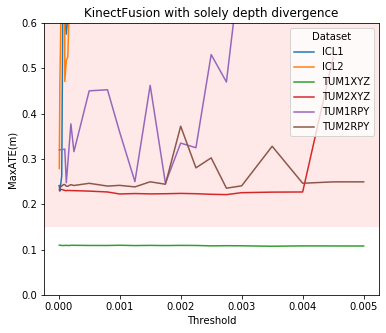

In [163]:
mycleandata1 = [ {'config': float(re.search("0-1-ICL1-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl1_kf_dep.items())[:] ]
mycleandata2 = [ {'config': float(re.search("0-1-ICL2-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl2_kf_dep.items())[:] ]

mycleandata4 = [ {'config': float(re.search("0-1-TUM1XYZ-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1xyz_kf_dep.items())[:] ]
mycleandata5 = [ {'config': float(re.search("0-1-TUM2XYZ-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2xyz_kf_dep.items())[:] ]
mycleandata6 = [ {'config': float(re.search("0-1-TUM1RPY-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1rpy_kf_dep.items())[:] ]
mycleandata7 = [ {'config': float(re.search("0-1-TUM2RPY-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2rpy_kf_dep.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')
df4 = pd.DataFrame(mycleandata4).sort_values('config')
df5 = pd.DataFrame(mycleandata5).sort_values('config')
df6 = pd.DataFrame(mycleandata6).sort_values('config')
df7 = pd.DataFrame(mycleandata7).sort_values('config')

plt.plot('config', 'MaxATE', data=df1, label='ICL1')
plt.plot('config', 'MaxATE', data=df2, label='ICL2')
plt.plot('config', 'MaxATE', data=df4, label='TUM1XYZ')
plt.plot('config', 'MaxATE', data=df5, label='TUM2XYZ')
plt.plot('config', 'MaxATE', data=df6, label='TUM1RPY')
plt.plot('config', 'MaxATE', data=df7, label='TUM2RPY')
plt.ylim(0,0.6)
plt.axhspan(0.15, 0.6, color='r', alpha=0.09, lw=0)
plt.legend(title="Dataset")
plt.xlabel("Threshold")
plt.ylabel("MaxATE(m)")
plt.title("KinectFusion with solely depth divergence")
print(sum(tum1xyz_kf_dep['./experiments/original/0-1-TUM1XYZ-KF-0.005.log']['Statistics']['Duration_Frame']))

      config    MaxATE
23  0.000010  0.023630
17  0.000020  0.023575
13  0.000050  0.022750
3   0.000080  0.022178
10  0.000100  0.022815
19  0.000125  0.022061
22  0.000150  0.220285
8   0.000200  0.224566
0   0.000250  0.219988
11  0.000500  0.225283
5   0.000800  0.217801
16  0.001000  3.451877
6   0.001250  2.929909
9   0.001500  3.354317
20  0.001750  1.478967
21  0.002000  3.408831
1   0.002250  3.283242
7   0.002500  3.792555
12  0.002750  2.043469
18  0.003000  3.691018
4   0.003500  3.347786
15  0.004000  2.771889
2   0.004500  1.961962
14  0.005000  1.280582
4.508114
3.676247999999995
3.649481000000001


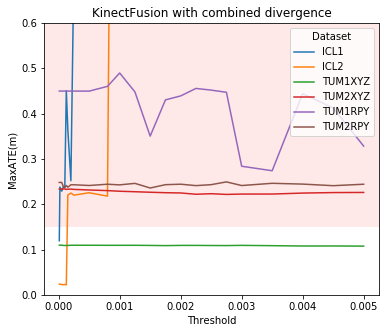

In [168]:
mycleandata1 = [ {'config': float(re.search("1-1-ICL1-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl1_kf_com.items())[:] ]
mycleandata2 = [ {'config': float(re.search("1-1-ICL2-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl2_kf_com.items())[:] ]

mycleandata4 = [ {'config': float(re.search("1-1-TUM1XYZ-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1xyz_kf_com.items())[:] ]
mycleandata5 = [ {'config': float(re.search("1-1-TUM2XYZ-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2xyz_kf_com.items())[:] ]
mycleandata6 = [ {'config': float(re.search("1-1-TUM1RPY-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1rpy_kf_com.items())[:] ]
mycleandata7 = [ {'config': float(re.search("1-1-TUM2RPY-KF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2rpy_kf_com.items())[:] ]



df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')
df4 = pd.DataFrame(mycleandata4).sort_values('config')
df5 = pd.DataFrame(mycleandata5).sort_values('config')
df6 = pd.DataFrame(mycleandata6).sort_values('config')
df7 = pd.DataFrame(mycleandata7).sort_values('config')

plt.plot('config', 'MaxATE', data=df1, label='ICL1')
plt.plot('config', 'MaxATE', data=df2, label='ICL2')
plt.plot('config', 'MaxATE', data=df4, label='TUM1XYZ')
plt.plot('config', 'MaxATE', data=df5, label='TUM2XYZ')
plt.plot('config', 'MaxATE', data=df6, label='TUM1RPY')
plt.plot('config', 'MaxATE', data=df7, label='TUM2RPY')
plt.ylim(0,0.6)
plt.axhspan(0.15, 0.6, color='r', alpha=0.09, lw=0)
plt.legend(title="Dataset")
plt.xlabel("Threshold")
plt.ylabel("MaxATE(m)")
plt.title("KinectFusion with combined divergence")
print(df2)
print(sum(icl1_kf_com['./experiments/original/1-1-ICL1-KF-0.00001.log']['Statistics']['Duration_Frame']))
print(sum(icl2_kf_com['./experiments/original/1-1-ICL2-KF-0.000125.log']['Statistics']['Duration_Frame']))
print(sum(tum1xyz_kf_com['./experiments/original/1-1-TUM1XYZ-KF-0.005.log']['Statistics']['Duration_Frame']))

      config    MaxATE
5   0.000010  0.132585
3   0.000020  0.132668
0   0.000050  0.205079
19  0.000080  0.180308
17  0.000100  0.198574
14  0.000125  0.270287
6   0.000150  0.192345
20  0.000200  0.268902
15  0.000500  0.255208
4   0.000800  0.266460
9   0.001250  0.293817
18  0.001500  0.276919
12  0.002000  0.236839
16  0.002250  0.248990
1   0.002500  0.256293
8   0.002750  0.274702
13  0.003000  0.291212
2   0.003500  0.338811
10  0.004000  0.424527
7   0.004500  0.411509
11  0.005000  0.488953
1.0068609999999985
1.3626219999999998
3.726546999999997
1.4756859999999992


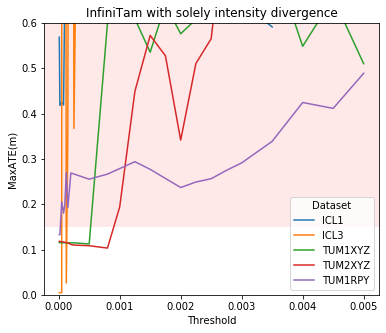

In [176]:
mycleandata1 = [ {'config': float(re.search("1-0-ICL1-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl1_inf_int.items())[:] ]
mycleandata2 = [ {'config': float(re.search("1-0-ICL3-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl3_inf_int.items())[:] ]

mycleandata4 = [ {'config': float(re.search("1-0-TUM1XYZ-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1xyz_inf_int.items())[:] ]
mycleandata5 = [ {'config': float(re.search("1-0-TUM2XYZ-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2xyz_inf_int.items())[:] ]
mycleandata6 = [ {'config': float(re.search("1-0-TUM1RPY-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1rpy_inf_int.items())[:] ]



df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')

df4 = pd.DataFrame(mycleandata4).sort_values('config')
df5 = pd.DataFrame(mycleandata5).sort_values('config')
df6 = pd.DataFrame(mycleandata6).sort_values('config')

plt.plot('config', 'MaxATE', data=df1, label='ICL1')
plt.plot('config', 'MaxATE', data=df2, label='ICL3')
plt.plot('config', 'MaxATE', data=df4, label='TUM1XYZ')
plt.plot('config', 'MaxATE', data=df5, label='TUM2XYZ')
plt.plot('config', 'MaxATE', data=df6, label='TUM1RPY')
plt.ylim(0,0.6)
plt.axhspan(0.15, 0.6, color='r', alpha=0.09, lw=0)
plt.legend(title="Dataset")
plt.xlabel("Threshold")
plt.ylabel("MaxATE(m)")
plt.title("InfiniTam with solely intensity divergence")

print(sum(icl3_inf_int['./experiments/original/1-0-ICL3-INF-0.00005.log']['Statistics']['Duration_Frame']))
print(sum(tum1xyz_inf_int['./experiments/original/1-0-TUM1XYZ-INF-0.0005.log']['Statistics']['Duration_Frame']))
print(sum(tum2xyz_inf_int['./experiments/original/1-0-TUM2XYZ-INF-0.0008.log']['Statistics']['Duration_Frame']))
print(sum(tum1rpy_inf_int['./experiments/original/1-0-TUM1RPY-INF-0.00002.log']['Statistics']['Duration_Frame']))



      config    MaxATE
8   0.000010  0.132864
6   0.000020  0.133151
4   0.000050  0.132692
14  0.000080  0.132640
21  0.000100  0.135803
18  0.000125  0.133082
7   0.000150  0.132709
20  0.000200  0.132155
10  0.000250  0.132215
17  0.000500  0.131582
3   0.000800  0.131039
19  0.001250  0.131774
22  0.001500  0.331476
9   0.001750  0.289408
12  0.002000  0.352123
13  0.002250  0.295239
0   0.002500  0.309500
2   0.002750  0.271830
11  0.003000  0.397994
1   0.003500  0.338520
16  0.004000  0.348756
5   0.004500  0.240903
15  0.005000  0.476382
1.2213770000000013
1.4867339999999998
8.001527999999999
1.2752149999999995


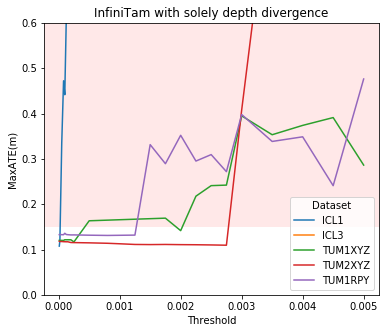

In [184]:
mycleandata1 = [ {'config': float(re.search("0-1-ICL1-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl1_inf_dep.items())[:] ]
mycleandata2 = [ {'config': float(re.search("0-1-ICL3-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl3_inf_dep.items())[:] ]

mycleandata4 = [ {'config': float(re.search("0-1-TUM1XYZ-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1xyz_inf_dep.items())[:] ]
mycleandata5 = [ {'config': float(re.search("0-1-TUM2XYZ-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2xyz_inf_dep.items())[:] ]
mycleandata6 = [ {'config': float(re.search("0-1-TUM1RPY-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1rpy_inf_dep.items())[:] ]



df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')

df4 = pd.DataFrame(mycleandata4).sort_values('config')
df5 = pd.DataFrame(mycleandata5).sort_values('config')
df6 = pd.DataFrame(mycleandata6).sort_values('config')

plt.plot('config', 'MaxATE', data=df1, label='ICL1')
plt.plot('config', 'MaxATE', data=df2, label='ICL3')
plt.plot('config', 'MaxATE', data=df4, label='TUM1XYZ')
plt.plot('config', 'MaxATE', data=df5, label='TUM2XYZ')
plt.plot('config', 'MaxATE', data=df6, label='TUM1RPY')
plt.ylim(0,0.6)
plt.axhspan(0.15, 0.6, color='r', alpha=0.09, lw=0)
plt.legend(title="Dataset")
plt.xlabel("Threshold")
plt.ylabel("MaxATE(m)")
plt.title("InfiniTam with solely depth divergence")
print(df6)
print(sum(icl1_inf_dep['./experiments/original/0-1-ICL1-INF-0.00002.log']['Statistics']['Duration_Frame']))
print(sum(tum1xyz_inf_dep['./experiments/original/0-1-TUM1XYZ-INF-0.0005.log']['Statistics']['Duration_Frame']))
print(sum(tum2xyz_inf_dep['./experiments/original/0-1-TUM2XYZ-INF-0.00275.log']['Statistics']['Duration_Frame']))
print(sum(tum1rpy_inf_dep['./experiments/original/0-1-TUM1RPY-INF-0.00125.log']['Statistics']['Duration_Frame']))

      config    MaxATE
14  0.000010  0.150285
18  0.000020  0.133419
21  0.000050  0.133495
7   0.000080  0.132924
16  0.000100  0.132789
19  0.000125  0.133415
13  0.000150  0.132644
12  0.000200  0.133198
20  0.000500  0.133095
8   0.000800  0.133311
6   0.001000  0.132700
4   0.001250  0.133000
17  0.001500  0.132764
15  0.001750  0.132773
2   0.002000  0.132609
11  0.002250  0.132670
10  0.002500  0.132490
22  0.002750  0.133242
3   0.003000  0.187799
9   0.003500  0.185896
0   0.004000  0.189106
5   0.004500  0.274222
1   0.005000  0.223978
1.8584110000000014
1.4125890000000005
7.919962000000002
1.4129269999999987


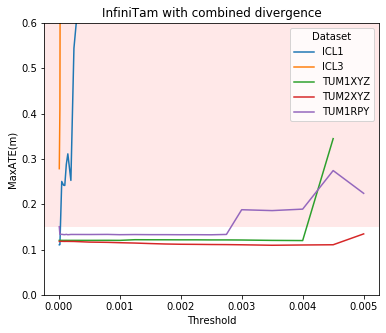

In [191]:
mycleandata1 = [ {'config': float(re.search("1-1-ICL1-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl1_inf_com.items())[:] ]
mycleandata2 = [ {'config': float(re.search("1-1-ICL3-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(icl3_inf_com.items())[:] ]

mycleandata4 = [ {'config': float(re.search("1-1-TUM1XYZ-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1xyz_inf_com.items())[:] ]
mycleandata5 = [ {'config': float(re.search("1-1-TUM2XYZ-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum2xyz_inf_com.items())[:] ]
mycleandata6 = [ {'config': float(re.search("1-1-TUM1RPY-INF-(.+?).log", k).group(1)), 'MaxATE':  x ['Summary']['unnamed']['AbsoluteError']['MAX']} for (k,x) in list(tum1rpy_inf_com.items())[:] ]



df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')

df4 = pd.DataFrame(mycleandata4).sort_values('config')
df5 = pd.DataFrame(mycleandata5).sort_values('config')
df6 = pd.DataFrame(mycleandata6).sort_values('config')

plt.plot('config', 'MaxATE', data=df1, label='ICL1')
plt.plot('config', 'MaxATE', data=df2, label='ICL3')
plt.plot('config', 'MaxATE', data=df4, label='TUM1XYZ')
plt.plot('config', 'MaxATE', data=df5, label='TUM2XYZ')
plt.plot('config', 'MaxATE', data=df6, label='TUM1RPY')
plt.ylim(0,0.6)
plt.axhspan(0.15, 0.6, color='r', alpha=0.09, lw=0)
plt.legend(title="Dataset")
plt.xlabel("Threshold")
plt.ylabel("MaxATE(m)")
plt.title("InfiniTam with combined divergence")

print(sum(icl1_inf_com['./experiments/original/1-1-ICL1-INF-0.00002.log']['Statistics']['Duration_Frame']))
print(sum(tum1xyz_inf_com['./experiments/original/1-1-TUM1XYZ-INF-0.004.log']['Statistics']['Duration_Frame']))
print(sum(tum2xyz_inf_com['./experiments/original/1-1-TUM2XYZ-INF-0.005.log']['Statistics']['Duration_Frame']))
print(sum(tum1rpy_inf_com['./experiments/original/1-1-TUM1RPY-INF-0.00275.log']['Statistics']['Duration_Frame']))

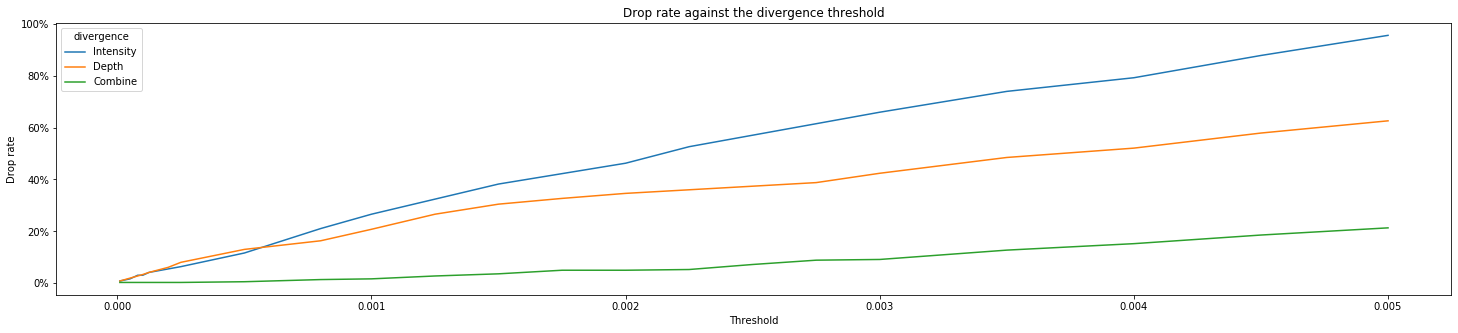

In [200]:
import matplotlib.ticker as mtick
total_frame = max(tum1rpy_kf['./experiments/original/TUM1RPY-KF.log']['Statistics']['Frame Number'])

mycleandata1 = [ {'config': float(re.search("1-0-TUM1RPY-KF-(.+?).log", k).group(1)), 'frames':  max(x ['Statistics']['Frame Number'])} for (k,x) in list(tum1rpy_kf_int.items())[:] ]
mycleandata2 = [ {'config': float(re.search("0-1-TUM1RPY-KF-(.+?).log", k).group(1)), 'frames':  max(x ['Statistics']['Frame Number'])} for (k,x) in list(tum1rpy_kf_dep.items())[:] ]
mycleandata3 = [ {'config': float(re.search("1-1-TUM1RPY-KF-(.+?).log", k).group(1)), 'frames':  max(x ['Statistics']['Frame Number'])} for (k,x) in list(tum1rpy_kf_com.items())[:] ]

df1 = pd.DataFrame(mycleandata1).sort_values('config')
df2 = pd.DataFrame(mycleandata2).sort_values('config')
df3 = pd.DataFrame(mycleandata3).sort_values('config')
df1['rates'] = [ (total_frame - x) / (total_frame/2) for x in df1['frames'] ]
df2['rates'] = [ (total_frame - x) / (total_frame/2) for x in df2['frames'] ]
df3['rates'] = [ (total_frame - x) / (total_frame/2) for x in df3['frames'] ]

fig = plt.figure(1, (25,5))
ax = fig.add_subplot(1,1,1)

ax.plot('config', 'rates', data=df1, label='Intensity')
ax.plot('config', 'rates', data=df2, label='Depth')
ax.plot('config', 'rates', data=df3, label='Combine')
ax.legend(title='divergence')
plt.ylabel('Drop rate')
plt.xlabel('Threshold')
plt.title('Drop rate against the divergence threshold')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


In [114]:
print(sum(icl0_kf['./experiments/original/ICL0-KF.log']['Statistics']['Duration_Frame']))
print(sum(icl1_kf['./experiments/original/ICL1-KF.log']['Statistics']['Duration_Frame']))
print(sum(icl2_kf['./experiments/original/ICL2-KF.log']['Statistics']['Duration_Frame']))
print(sum(icl3_kf['./experiments/original/ICL3-KF.log']['Statistics']['Duration_Frame']))

print(sum(tum1rpy_kf['./experiments/original/TUM1RPY-KF.log']['Statistics']['Duration_Frame']))
print(sum(tum1xyz_kf['./experiments/original/TUM1XYZ-KF.log']['Statistics']['Duration_Frame']))
print(sum(tum2rpy_kf['./experiments/original/TUM2RPY-KF.log']['Statistics']['Duration_Frame']))
print(sum(tum2xyz_kf['./experiments/original/TUM2XYZ-KF.log']['Statistics']['Duration_Frame']))

print(sum(icl0_inf['./experiments/original/ICL0-INF.log']['Statistics']['Duration_Frame']))
print(sum(icl1_inf['./experiments/original/ICL1-INF.log']['Statistics']['Duration_Frame']))
print(sum(icl2_inf['./experiments/original/ICL2-INF.log']['Statistics']['Duration_Frame']))
print(sum(icl3_inf['./experiments/original/ICL3-INF.log']['Statistics']['Duration_Frame']))

print(sum(tum1rpy_inf['./experiments/original/TUM1RPY-INF.log']['Statistics']['Duration_Frame']))
print(sum(tum1xyz_inf['./experiments/original/TUM1XYZ-INF.log']['Statistics']['Duration_Frame']))
print(sum(tum2rpy_inf['./experiments/original/TUM2RPY-INF.log']['Statistics']['Duration_Frame']))
print(sum(tum2xyz_inf['./experiments/original/TUM2XYZ-INF.log']['Statistics']['Duration_Frame']))

print(sum(icl0_orb['./experiments/original/ICL0-ORB.log']['Statistics']['Duration_Frame']))
print(sum(icl1_orb['./experiments/original/ICL1-ORB.log']['Statistics']['Duration_Frame']))
print(sum(icl2_orb['./experiments/original/ICL2-ORB.log']['Statistics']['Duration_Frame']))
print(sum(icl3_orb['./experiments/original/ICL3-ORB.log']['Statistics']['Duration_Frame']))

print(sum(tum1rpy_orb['./experiments/original/TUM1RPY-ORB.log']['Statistics']['Duration_Frame']))
print(sum(tum1xyz_orb['./experiments/original/TUM1XYZ-ORB.log']['Statistics']['Duration_Frame']))
print(sum(tum2rpy_orb['./experiments/original/TUM2RPY-ORB.log']['Statistics']['Duration_Frame']))
print(sum(tum2xyz_orb['./experiments/original/TUM2XYZ-ORB.log']['Statistics']['Duration_Frame']))

6.619365000000009
3.992616
3.552468999999997
5.558593999999996
3.4082480000000026
3.285873
20.85876299999998
24.882145000000037
3.5795800000000018
2.0505780000000016
1.8892269999999989
1.9867429999999993
1.3286750000000012
1.2636250000000013
9.925618000000021
13.355919000000005
22.987729000000012
13.778902999999985
13.795509000000006
17.689574000000025
13.874858999999992
15.605025999999999
65.19811900000008
77.71613299999999


In [115]:
print(icl0_kf['./experiments/original/ICL0-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl1_kf['./experiments/original/ICL1-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl2_kf['./experiments/original/ICL2-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl3_kf['./experiments/original/ICL3-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])

print(tum1rpy_kf['./experiments/original/TUM1RPY-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum1xyz_kf['./experiments/original/TUM1XYZ-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum2rpy_kf['./experiments/original/TUM2RPY-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum2xyz_kf['./experiments/original/TUM2XYZ-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])

print(icl0_inf['./experiments/original/ICL0-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl1_inf['./experiments/original/ICL1-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl2_inf['./experiments/original/ICL2-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl3_inf['./experiments/original/ICL3-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])

print(tum1rpy_inf['./experiments/original/TUM1RPY-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum1xyz_inf['./experiments/original/TUM1XYZ-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum2rpy_inf['./experiments/original/TUM2RPY-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum2xyz_inf['./experiments/original/TUM2XYZ-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])

print(icl0_orb['./experiments/original/ICL0-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl1_orb['./experiments/original/ICL1-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl2_orb['./experiments/original/ICL2-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl3_orb['./experiments/original/ICL3-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])

print(tum1rpy_orb['./experiments/original/TUM1RPY-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum1xyz_orb['./experiments/original/TUM1XYZ-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum2rpy_orb['./experiments/original/TUM2RPY-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum2xyz_orb['./experiments/original/TUM2XYZ-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])

1.9872120619
0.0186671484
0.0234038215
0.8229851127
0.4726847708
0.1139973328
0.2376661599
0.222440511
1.1257113218
0.0147376945
2.9965782166
0.2019791156
0.1396470517
0.1294569373
0.4351508617
0.118072398
0.0613070652
0.4111792147
0.0875657424
0.0534804612
0.1402741373
0.0963957682
0.0632052049
0.0811090916


In [ ]:
print(icl0_kf['./experiments/original/ICL0-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl1_kf['./experiments/original/ICL1-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl2_kf['./experiments/original/ICL2-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl3_kf['./experiments/original/ICL3-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])

print(tum1rpy_kf['./experiments/original/TUM1RPY-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum1xyz_kf['./experiments/original/TUM1XYZ-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum2rpy_kf['./experiments/original/TUM2RPY-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum2xyz_kf['./experiments/original/TUM2XYZ-KF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])

print(icl0_inf['./experiments/original/ICL0-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl1_inf['./experiments/original/ICL1-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl2_inf['./experiments/original/ICL2-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl3_inf['./experiments/original/ICL3-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])

print(tum1rpy_inf['./experiments/original/TUM1RPY-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum1xyz_inf['./experiments/original/TUM1XYZ-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum2rpy_inf['./experiments/original/TUM2RPY-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum2xyz_inf['./experiments/original/TUM2XYZ-INF.log']['Summary']['unnamed']['AbsoluteError']['MAX'])

print(icl0_orb['./experiments/original/ICL0-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl1_orb['./experiments/original/ICL1-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl2_orb['./experiments/original/ICL2-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(icl3_orb['./experiments/original/ICL3-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])

print(tum1rpy_orb['./experiments/original/TUM1RPY-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum1xyz_orb['./experiments/original/TUM1XYZ-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum2rpy_orb['./experiments/original/TUM2RPY-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])
print(tum2xyz_orb['./experiments/original/TUM2XYZ-ORB.log']['Summary']['unnamed']['AbsoluteError']['MAX'])